In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
store_data = pd.read_csv('../input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252')

In [3]:
del store_data['Row ID']

In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [5]:
store_data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
# here first we convert our datatype to datetime datatype
store_data['Ship Date'] = pd.to_datetime(store_data['Ship Date'])
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'])

# now we convert our date into dd-mm-yyyy formate but it remain in str datatype
store_data['Ship Date']=store_data['Ship Date'].dt.strftime('%d-%m-%Y')
store_data['Order Date']=store_data['Order Date'].dt.strftime('%d-%m-%Y')

# now if convert datatype our date formate will be change to yyyy-mm-dd
store_data['Ship Date'] = pd.to_datetime(store_data['Ship Date'])
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'])

 # > **Each city sales**

In [7]:
city_sale = store_data.groupby(['City']).Sales.sum()

In [8]:
import matplotlib.pyplot as plt

In [9]:
city_sale = city_sale.sort_values(ascending = False)

<AxesSubplot:xlabel='City'>

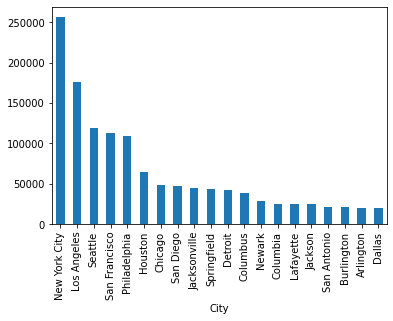

In [10]:
city_sale[:20].plot.bar(y='sales',rot=90)

# **Which Category has maximum purchase **

In [11]:
Category = store_data.groupby('Category').Category.count()
Profit = store_data.groupby('Category').Profit.sum()
cat_pro = pd.DataFrame({'Category_sale':Category,'Profit':Profit})

In [12]:
cat_pro =cat_pro.reset_index()
cat_pro

,Category,Category_sale,Profit
0,Furniture,2121,18451.2728
1,Office Supplies,6026,122490.8008
2,Technology,1847,145454.9481


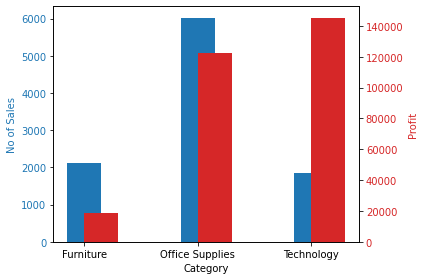

In [13]:
fig,ax1 = plt.subplots() # use to make two plot on same 

ax1.set_xlabel('Category')
ax1.set_ylabel('No of Sales',color = 'tab:blue')
ax1.bar(cat_pro['Category'],cat_pro['Category_sale'],color = 'tab:blue',align='center',width=0.3)
ax1.tick_params(axis='y', labelcolor='tab:blue') # to colour y lables(values)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Profit',color= 'tab:red')
ax2.bar(cat_pro['Category'],cat_pro['Profit'],color = 'tab:red',align='edge',width=0.3)
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()